<a href="https://colab.research.google.com/github/ocean5apphotmail/AiLearning/blob/master/Deep_Learning_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# <font color = 'silver'>第2章 感知机</font>



图2-1是一个接收两个输入信号的感知机的例子。x1、x2是输入信号，
y是输出信号，w1、w2是权重（w是weight的首字母）。图中的○称为“神
经元”或者“节点”。输入信号被送往神经元时，会被分别乘以固定的权重
（w1x1、w2x2）。神经元会计算传送过来的信号的总和，只有当这个总和超过
了某个界限值时，才会输出1。这也称为“神经元被激活”。这里将这个界
限值称为阈值，用符号θ表示

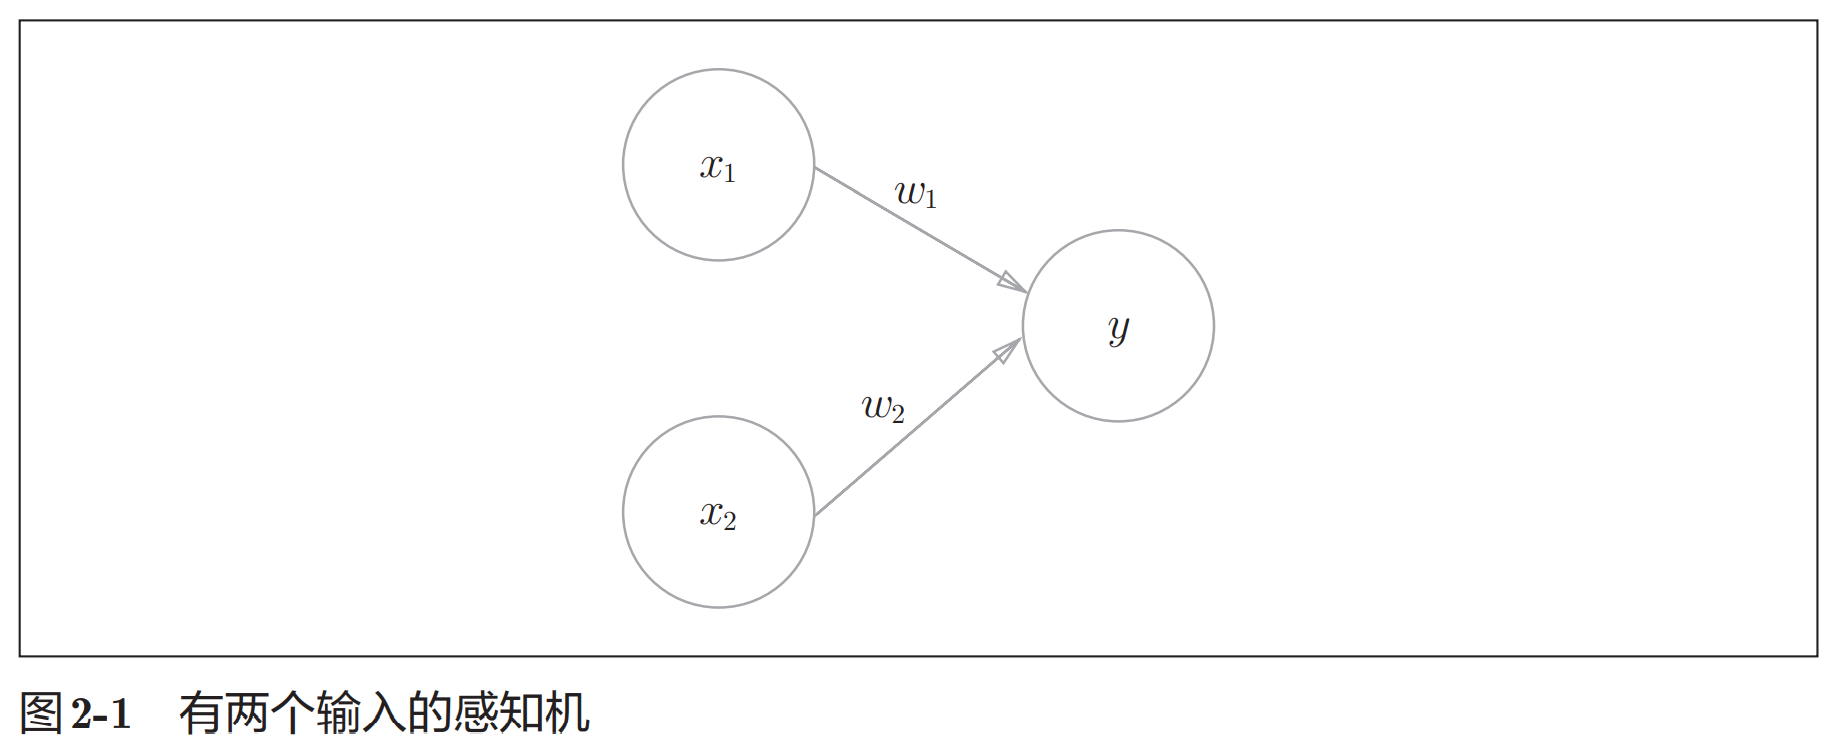


<font size = 14>1. y = 0 (w1x1 + w2x2 <= θ)</font>

<font size = 14>2. y = 1 (w1x1 + w2x2 > θ) </font>

## <font color = 'silver'>2.2 简单逻辑电路</font>
#### <font color = 'silver'>2.2.1　与门</font>


| X1 | X2 | Y |
| ------ | ------ | ------ |
| 0 | 0 | 0 |
| 1 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 1 | 1 |
图2-2